<a href="https://colab.research.google.com/github/a-gasior/DSA/blob/master/ExploreData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_path = 'drive/My Drive/Data Solution Analyst Case Study/Data/data.csv'

Mounted at /content/drive


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
def plot_to_file(plot,plot_name):
  images_out = 'drive/My Drive/Data Solution Analyst Case Study/images/'
  fig = plot.get_figure()
  fig.savefig(images_out+plot_name+'.png')

def fig_to_file(fig,plot_name):
  images_out = 'drive/My Drive/Data Solution Analyst Case Study/images/'
  fig.savefig(images_out+plot_name+'.png')

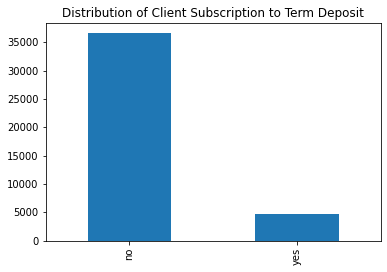

In [4]:
df = pd.read_csv(data_path)
df['y'].value_counts().plot(kind='bar',title='Distribution of Client Subscription to Term Deposit')

In [5]:
def transform_y_to_numeric(row):
  if row['y'] == 'no':
    return 0
  else:
    return 1

In [6]:
df['yNumeric'] = df.apply(lambda row: transform_y_to_numeric(row), axis=1)

In [7]:
def calc_brier(row):
  return (row['ModelPrediction'] - row['yNumeric'])**2

In [8]:
df['brierScore'] = df.apply(lambda row: calc_brier(row), axis=1)

In [9]:
(df['brierScore'].sum())/len(df)

0.7503640549181537

In [12]:
df_pos = df.loc[df['y'] == 'yes']
df_neg = df.loc[df['y'] == 'no']

In [82]:
def create_histograms(col):
  attr = col

  fig1,((ax_neg, ax_pos)) = plt.subplots(1,2)

  y1, x1, _  = ax_neg.hist(df_neg.loc[:,attr])
  y2, x2, _ = ax_pos.hist(df_pos.loc[:,attr])

  ultra_max = max(y1.max(),y2.max()) + 500


  ax_neg.set_title('Did not subscribe')
  ax_neg.set_xlabel(attr)
  ax_neg.set_ylim([0,ultra_max])

  ax_pos.set_title('Did subscribe')
  ax_pos.set_xlabel(attr)
  ax_pos.set_ylim([0,ultra_max])

  fig1.tight_layout()
  fig_to_file(fig1,col)

In [ ]:
for col in df.columns[:-4]:
  create_histograms(col)

In [77]:
fig_to_file(fig1,'job')